In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib widget

In [2]:
state_abbreviations = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}

file_to_load = "datasets/Motor_Vehicle_Registrations_Dashboard_data.csv"

vehicle_data = pd.read_csv(file_to_load)

In [3]:
vehicle_data = vehicle_data.drop(vehicle_data[vehicle_data["state"] == "Puerto Rico"].index)
vehicle_data = vehicle_data.drop(vehicle_data[vehicle_data["state"] == "Dist. of Col."].index)
vehicle_data = vehicle_data.drop(vehicle_data[vehicle_data["state"] == "District of Columbia"].index)

vehicle_data["state"] = vehicle_data["state"].str.replace(" (2)", "")
vehicle_data["state"] = vehicle_data["state"].replace(state_abbreviations)

vehicle_data = vehicle_data.rename(columns = {"year": "Year", "state": "State"})

stats_2020 = vehicle_data.loc[vehicle_data["Year"] == 2020]
stats_2020.head()

,Year,State,Auto,Bus,Truck,Motorcycle
6242,2020,AL,2035376.0,5624.0,3164439.0,114901.0
6243,2020,AK,171144.0,8620.0,586281.0,26781.0
6244,2020,AZ,2410018.0,8486.0,3514203.0,121074.0
6245,2020,AR,872437.0,12044.0,1859091.0,169797.0
6246,2020,CA,14201400.0,100828.0,15310597.0,785424.0


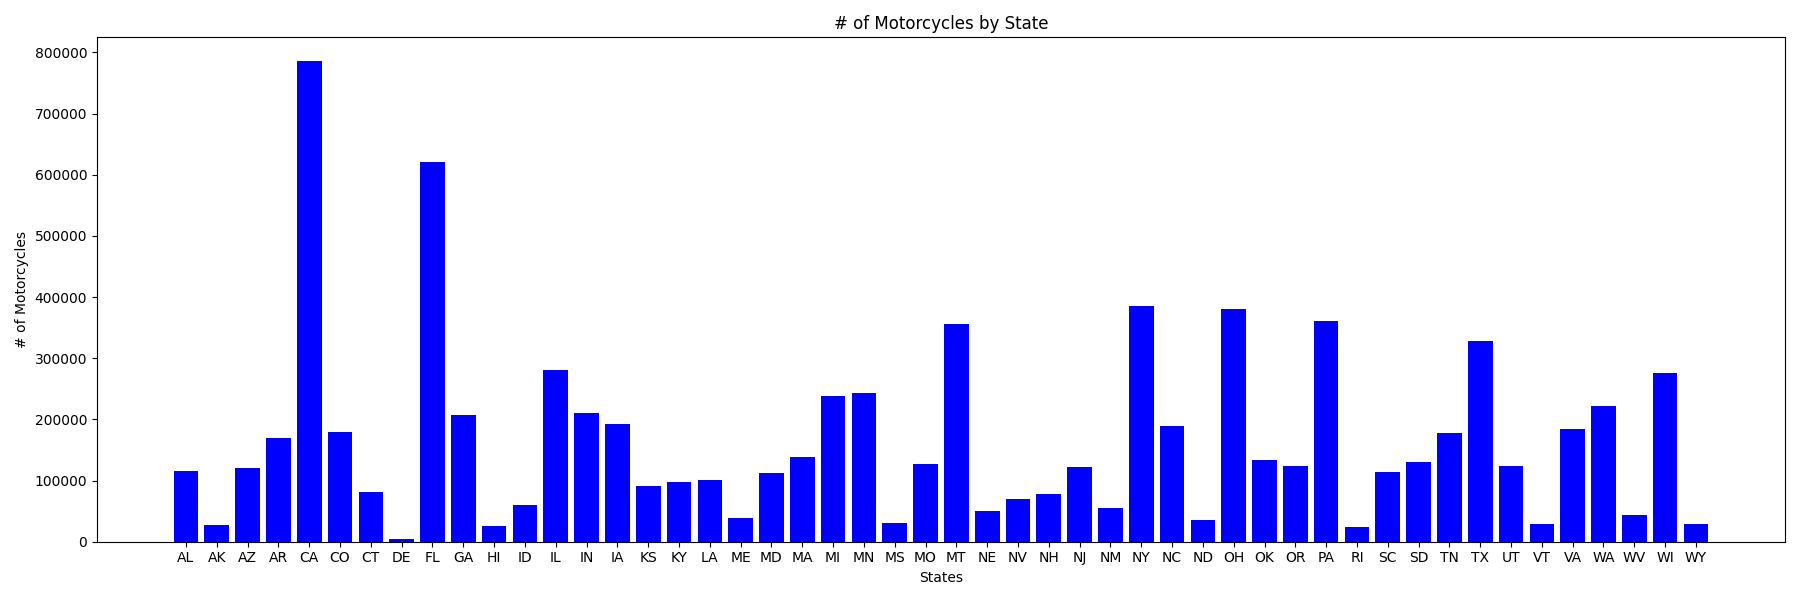

In [4]:
motorcycle_fig = plt.figure(figsize=(18,6))

data_keys = stats_2020["State"]
data_values= stats_2020["Motorcycle"]

plt.bar(data_keys,
        data_values,
        color = "blue",
        )

plt.ticklabel_format(style = "plain", axis='y')
plt.xlabel("States")
plt.ylabel("# of Motorcycles")
plt.title("# of Motorcycles by State")
motorcycle_fig.tight_layout()

In [5]:
new_dataframe = pd.DataFrame()
i = 1900
while i <= 2020:
    place_holder = vehicle_data.loc[vehicle_data["Year"] == i]
    place_holder = place_holder.drop("State", axis = 1)
    place_holder = place_holder.filter(items = ["Auto", "Bus", "Truck", "Motorcycle"], axis = 1).sum()
    place_holder["Year"] = f"{i}"
    new_dataframe = pd.concat([new_dataframe, place_holder], axis = 1)
    i += 20

total_vehicles_per_20_years = new_dataframe.transpose()
total_vehicles_per_20_years

,Auto,Bus,Truck,Motorcycle,Year
0,7920.0,0.0,0.0,0.0,1900
0,8102391.0,0.0,1102609.0,234276.0,1920
0,27318117.0,99763.0,4870750.0,135566.0,1940
0,61486854.0,270359.0,11894594.0,573186.0,1960
0,121353706.0,525990.0,33648958.0,5689930.0,1980
0,133421132.0,743496.0,87068464.0,4344592.0,2000
0,104933693.0,1001336.0,161319080.0,8313796.0,2020


Text(0.5, 1.0, '# of Automobiles Per Year')

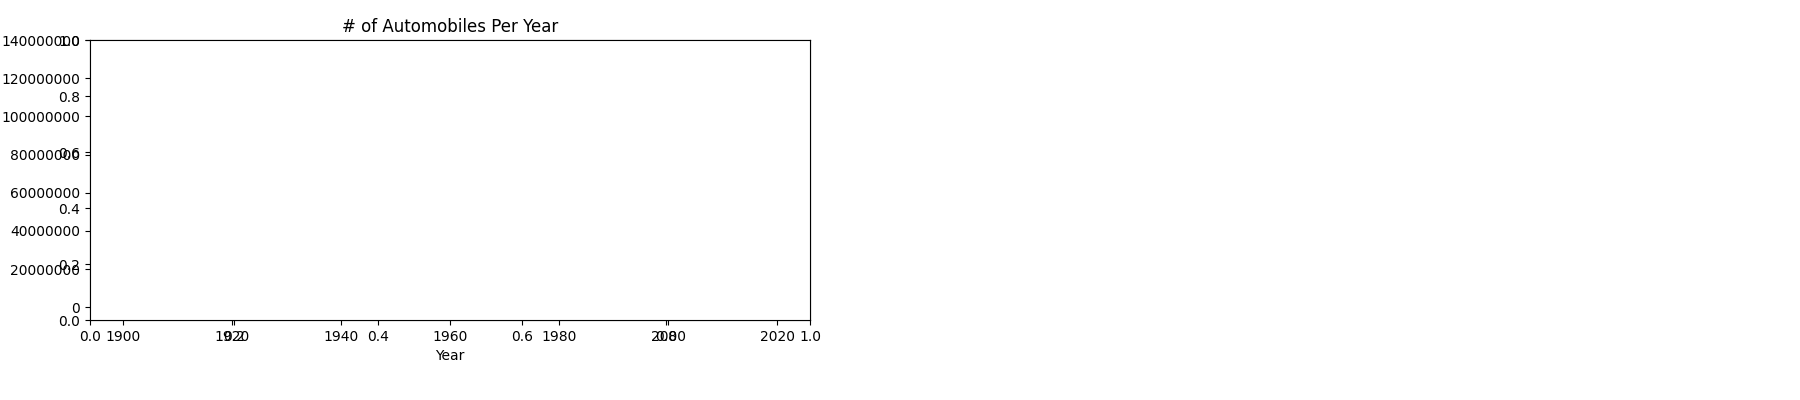

In [7]:
automobile_usage_fig = plt.figure(figsize=(18,4))

automobile_axes = automobile_usage_fig.add_axes([0.05,.2,.4,.7])
combined_axes = automobile_usage_fig.add_axes([0.05,.2,.4,.7])

data_keys = total_vehicles_per_20_years["Year"]
data_values = total_vehicles_per_20_years["Auto"]

automobile_axes.plot(data_keys,
        data_values,
        color = "green")

automobile_axes.ticklabel_format(style = "plain", axis='y')
automobile_axes.set_xlabel("Year")
automobile_axes.set_ylabel("# of Automobiles")
automobile_axes.set_title("# of Automobiles Per Year")